# Elbow Method for optimal value of k in KMeans

In [32]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

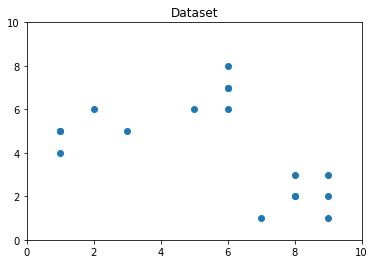

In [33]:
# Creating the data
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
X = pd.DataFrame(X)
  
# Visualizing the data
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

From the above visualization, we can see that the optimal number of clusters should be around 3. But visualizing the data alone cannot always give the right answer. Hence we demonstrate the following steps.
We now define the following

- Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
- Inertia: It is the sum of squared distances of samples to their closest cluster center.
We iterate the values of k from 1 to 9 and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range.

In [118]:
# Step 3: Building the clustering model and calculating the values of the Distortion and Inertia:

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
clusters = []
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeans = KMeans(n_clusters=k, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
	y_kmeans = kmeans.fit_predict(X)
	clusters.append(y_kmeans)

	distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeans.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeans.inertia_


In [119]:
# Step 4: Tabulating and Visualizing the results
# a) Using the different values of Distortion:

for key, val in mapping1.items():
	print(f'{key} : {val}')

1 : 3.4577032384495707
2 : 1.7687413573405673
3 : 0.8819889697423957
4 : 0.7587138847606585
5 : 0.6872918402957646
6 : 0.6178235133263348
7 : 0.5093717077076824
8 : 0.42618267462691206
9 : 0.3333333333333333


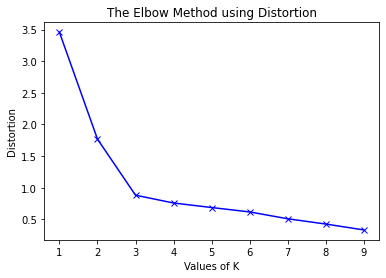

In [120]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


In [121]:
# b) Using the different values of Inertia:

for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 217.64705882352948
2 : 68.42857142857142
3 : 16.228571428571428
4 : 12.695238095238095
5 : 9.6
6 : 7.233333333333333
7 : 5.083333333333333
8 : 4.083333333333334
9 : 2.8333333333333335


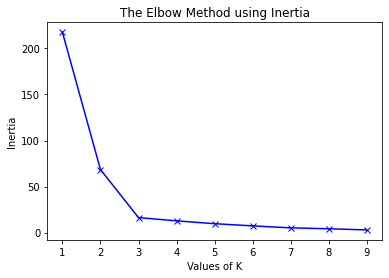

In [122]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.
The clustered data points for different value of k:-

## k=1

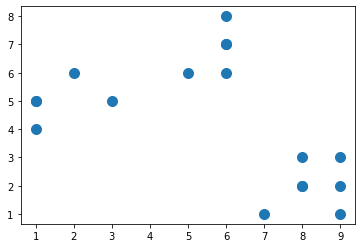

In [125]:
for i in range(5):
		plt.scatter(X[clusters[0]==i].iloc[:,0], X[clusters[0]==i].iloc[:,1], s=100, label ='Cluster '+str(i))

## k=2

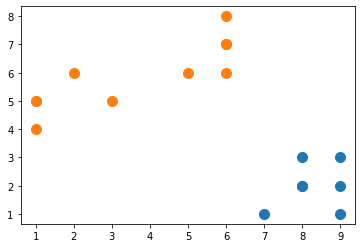

In [126]:
for i in range(5):
		plt.scatter(X[clusters[1]==i].iloc[:,0], X[clusters[1]==i].iloc[:,1], s=100, label ='Cluster '+str(i))

## k=3

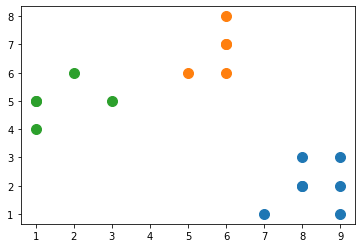

In [127]:
for i in range(5):
		plt.scatter(X[clusters[2]==i].iloc[:,0], X[clusters[2]==i].iloc[:,1], s=100, label ='Cluster '+str(i))

## k=4

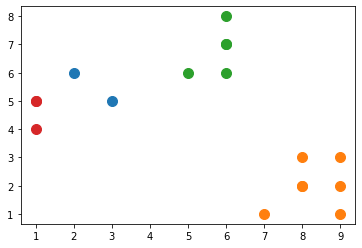

In [128]:
for i in range(5):
		plt.scatter(X[clusters[3]==i].iloc[:,0], X[clusters[3]==i].iloc[:,1], s=100, label ='Cluster '+str(i))

## k=5

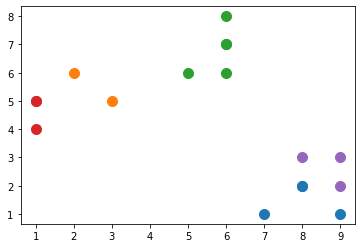

In [130]:
for i in range(5):
		plt.scatter(X[clusters[4]==i].iloc[:,0], X[clusters[4]==i].iloc[:,1], s=100, label ='Cluster '+str(i))